In [1]:
# Als je `import clusterizer` typt, dan zoekt Python naar mappen en .py-bestanden met die naam.
# De plekken waar python gaat zoeken staan in de lijst `sys.path`.
# Omdat we nu in SCG-analyse/notebooks zitten, moeten we de bovenliggende map (`SCG-analyse`)
# toevoegen aan de lijst van zoekplekken.
import sys
if "../.." not in sys.path:
    sys.path.append("../..")

# Hiermee wordt de clusterizer module herladen wanneer een bestand ervan verandert
# (handig als je aan de module aan het werken bent).
# Als je dit niet doet, wordt de code (zoals circuit.py, plot.py, etc) alleen geladen wanneer
# je `import clusterizer` typt. 
%load_ext autoreload
%autoreload 2


import clusterizer

import matplotlib.pyplot as plt

# Nodig om een np.datetime64 tijdstip (zoals in de partial_discharges DataFrame) 
# als ascoordinaat te gebruiken.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Hogere DPI voor plotjes (is mooi)
%config InlineBackend.figure_format = 'retina'
# Standaard grootte van plotjes in inches
plt.rcParams['figure.figsize'] = [8, 5]

import pandas as pd
import numpy as np


Git root path found at: C:\Users\matth\Desktop\SCG-analyse
Using data path:        C:\Users\matth\Desktop\SCG-analyse\data\origineel


In [2]:

circuitje=clusterizer.circuit.MergedCircuit(2063)
circuitje.build()


In [4]:
clusters = clusterizer.algorithms.clusterize_DBSCAN(circuitje)
clusterizer.plot.draw_location_time_scatter(circuitje)
clusterizer.plot.overlay_cluster_collection(clusters)

ValueError: min() arg is an empty sequence

In [17]:
len(clusterizer.globals.available_circuits)

372

In [ ]:
##timeit

In [9]:
%%timeit
algorithms = clusterizer.algorithms.clusterize_poisson, clusterizer.algorithms.clusterize_DBSCAN
clusterizer.algorithms.clusterize_ensemble(circuitje, algorithms=algorithms, add=False)

TypeError: unhashable type: 'set'

<IPython.core.display.Javascript object>


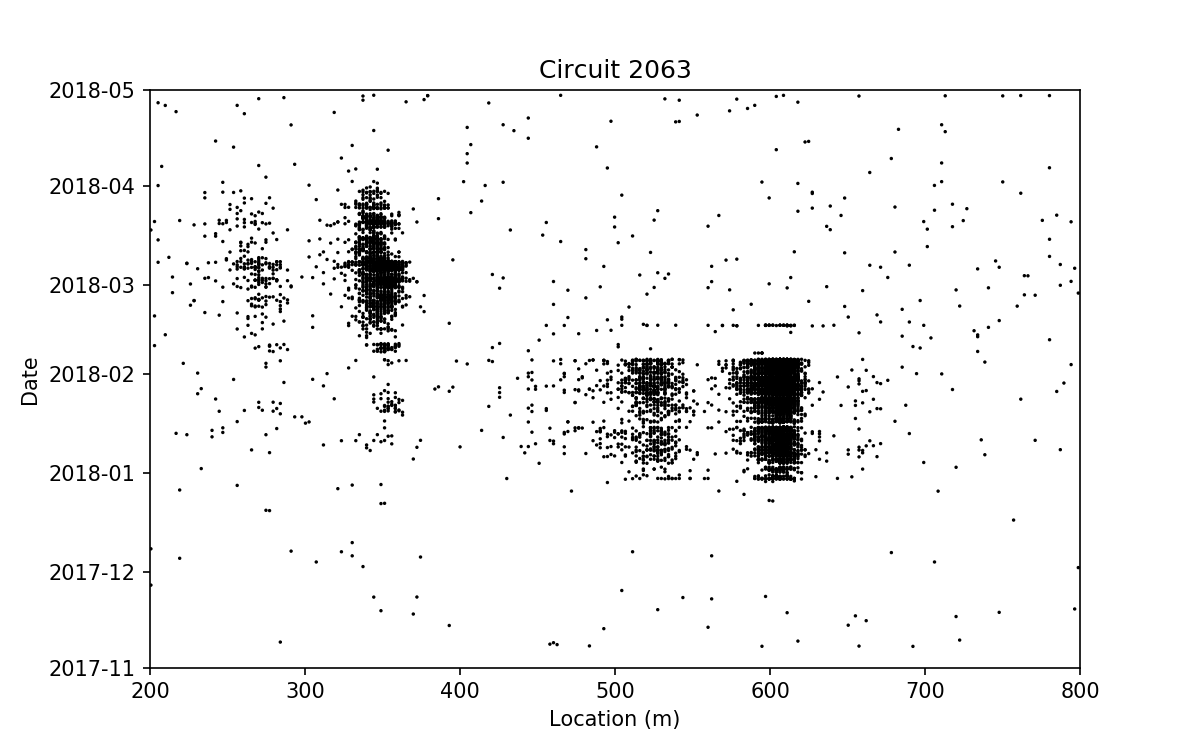

Saved to /notebooks/DBSCAN1.png


In [114]:
fig, ax = plt.subplots(figsize=(8,5))
clusterizer.plot.draw_location_time_scatter(circuitje, dot_size_to_charge_ratio=None, ax=ax)
ax.set_xlim(200,800)
ax.set_ylim(np.datetime64("2017-11", "ns"), np.datetime64("2018-05", "ns"))
clusterizer.plot.save_figure_for_google_slides("DBSCAN1")


<IPython.core.display.Javascript object>


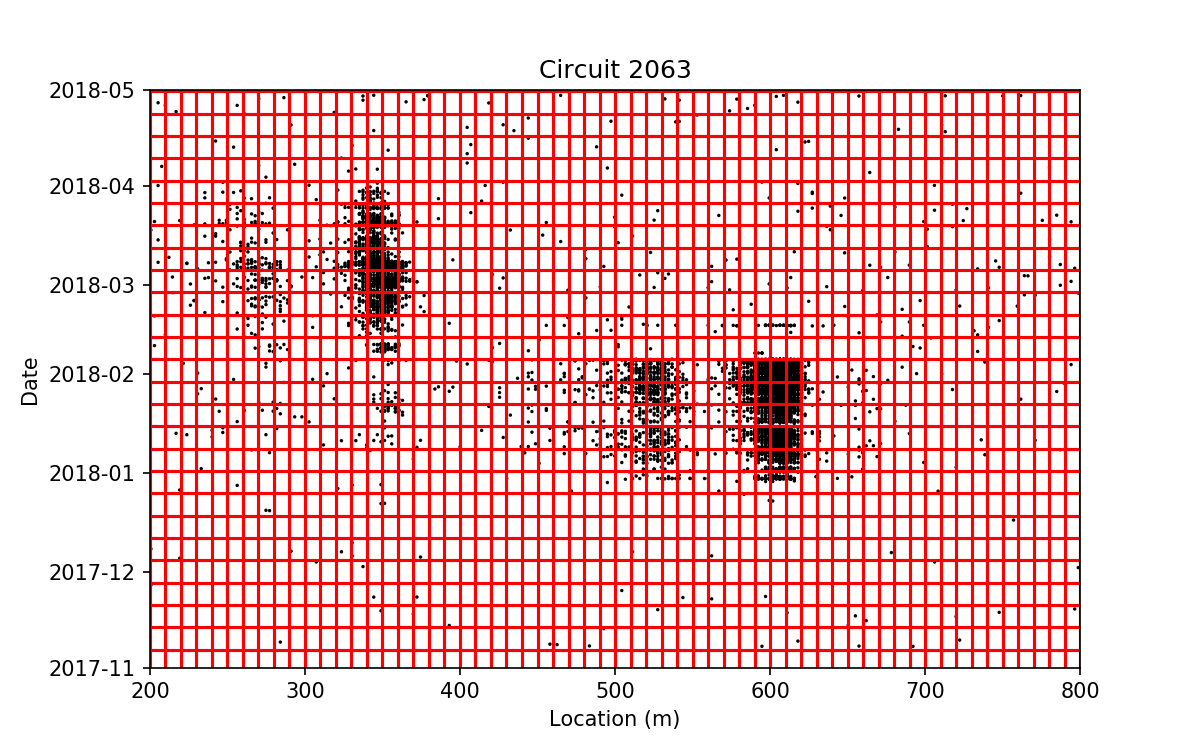

Saved to /notebooks/DBSCAN2.png


In [130]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(8,5))
clusterizer.plot.draw_location_time_scatter(circuitje, dot_size_to_charge_ratio=None, ax=ax)
base = np.datetime64('2017-08-21 14:39:00')
plt.plot([0,circuitje.circuitlength], [base, base], c = 'red')
for i in range(1,100):
    plt.plot([0,circuitje.circuitlength], [base+ np.timedelta64(i, 'W'), base + np.timedelta64(i, 'W')], '-r')
for i in range(0,1000,10):
    plt.plot([i, i], [np.datetime64('2017-08-21 14:39:00'), np.datetime64('2020-08-21 14:39:00')], '-r')
ax.set_xlim(200,800)
ax.set_ylim(np.datetime64("2017-11", "ns"), np.datetime64("2018-05", "ns"))
clusterizer.plot.save_figure_for_google_slides("DBSCAN2")

<IPython.core.display.Javascript object>


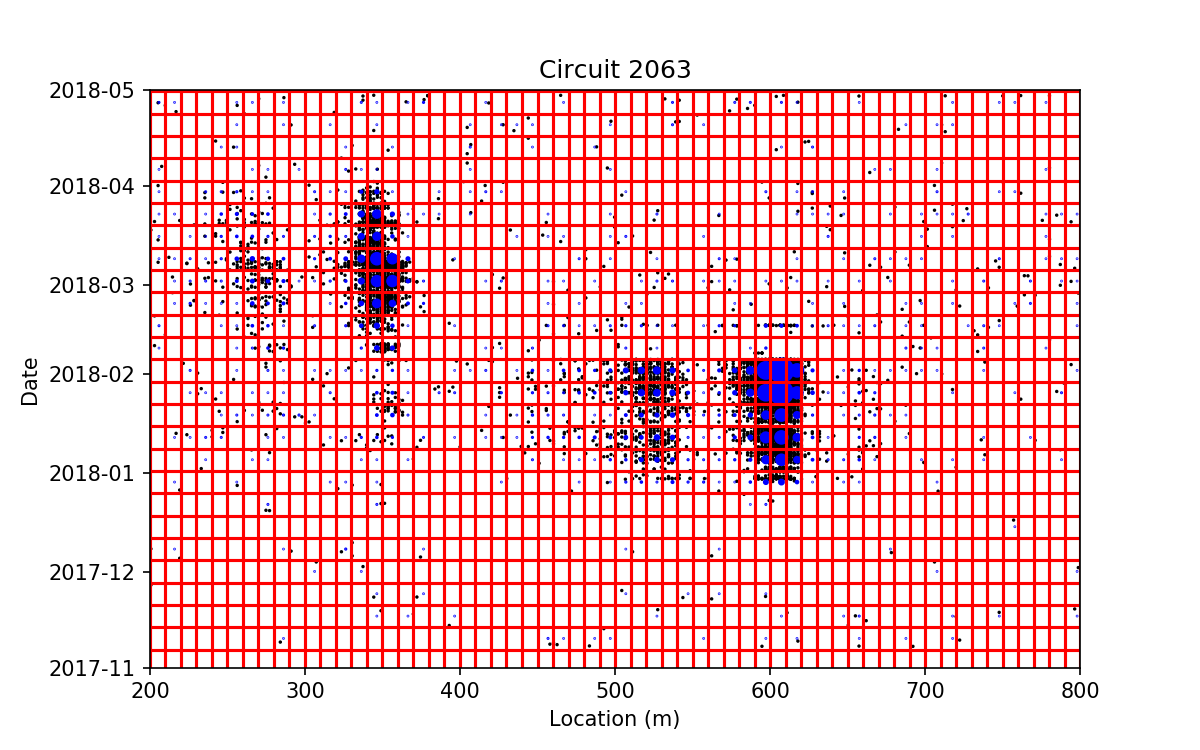

[[2]
 [0]
 [0]
 ...
 [0]
 [1]
 [6]]
Saved to /notebooks/DBSCAN3.png


In [124]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(8,5))
clusterizer.plot.draw_location_time_scatter(circuitje, dot_size_to_charge_ratio=None, ax=ax)
_,_,data, weights = clusterizer.algorithms.clusterize_DBSCAN(circuitje, binLengthX = 10, binLengthY = 1, epsilon = 3, minPts = 625, shave = 0.01)
lis = []
for x in data[:,1]:
    lis.append(str((np.datetime64(int(x*60*60*24*7), 's'))))
plt.scatter(data[:,0], lis, s=data[:,2]/10, c = 'blue')
base = np.datetime64('2017-08-21 14:39:00')
plt.plot([0,circuitje.circuitlength], [base, base], c = 'red')
for i in range(1,100):
    plt.plot([0,circuitje.circuitlength], [base+ np.timedelta64(i, 'W'), base + np.timedelta64(i, 'W')], '-r')
for i in range(0,1000,10):
    plt.plot([i, i], [np.datetime64('2017-08-21 14:39:00'), np.datetime64('2020-08-21 14:39:00')], '-r')
ax.set_xlim(200,800)
ax.set_ylim(np.datetime64("2017-11", "ns"), np.datetime64("2018-05", "ns"))
print(weights)
clusterizer.plot.save_figure_for_google_slides("DBSCAN3")

<IPython.core.display.Javascript object>


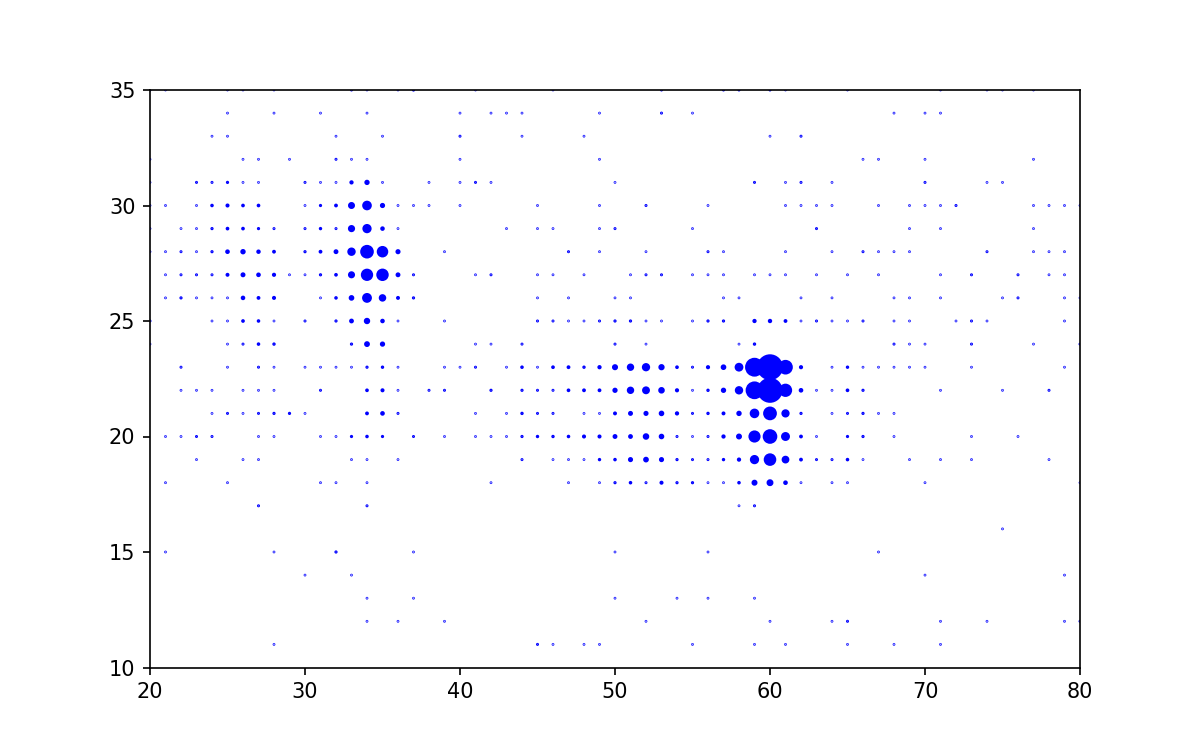

Saved to /notebooks/DBSCAN4.png


In [125]:
fig, ax = plt.subplots(figsize=(8,5))
data2 = np.mgrid[0:64, 0:229].reshape(2,-1).T.astype(np.float64)
plt.scatter(x=data2[:,1],y=data2[:,0], s=weights/10, c='blue')
ax.set_xlim(20,80)
ax.set_ylim(10,35)
clusterizer.plot.save_figure_for_google_slides("DBSCAN4")

<IPython.core.display.Javascript object>


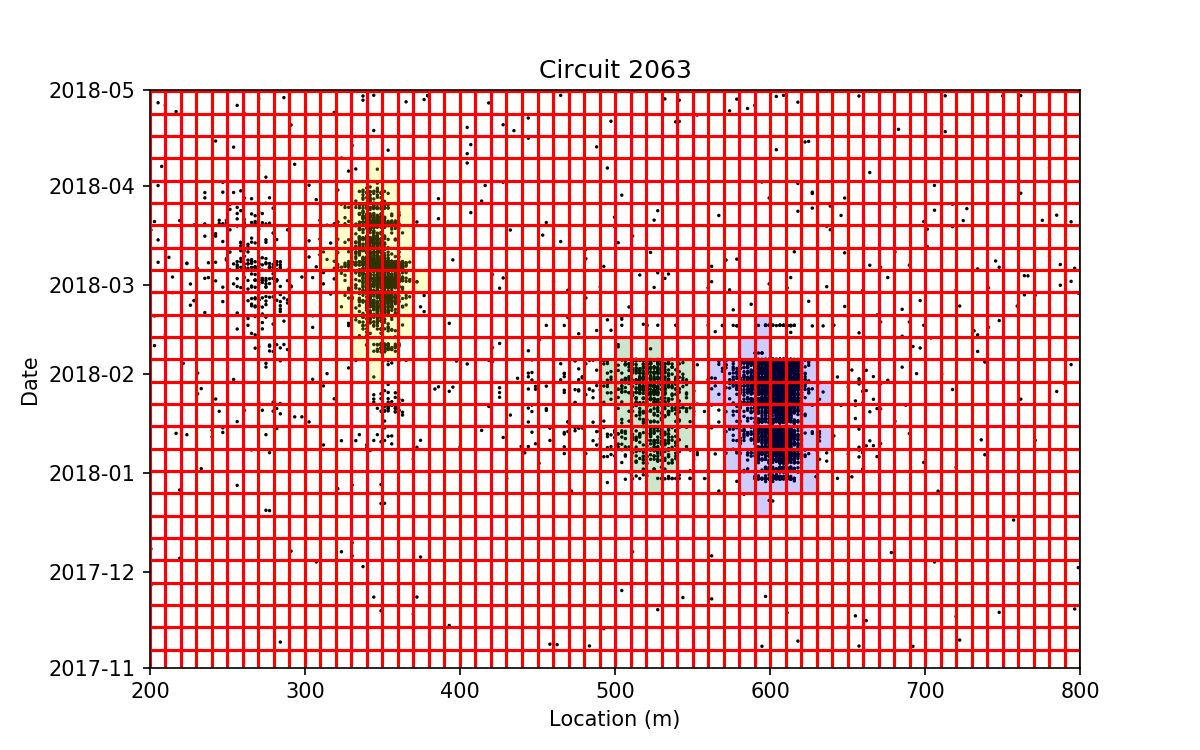

Saved to /notebooks/DBSCAN5.png


In [126]:
fig, ax = plt.subplots(figsize=(8,5))
clusterizer.plot.draw_location_time_scatter(circuitje, dot_size_to_charge_ratio=None, ax=ax)
_,_,data, weights = clusterizer.algorithms.clusterize_DBSCAN(circuitje, binLengthX = 10, binLengthY = 1, epsilon = 1, minPts = 100, shave = 0.01)
lis = []
for x in data[:,1]:
    lis.append(str((np.datetime64(int(x*60*60*24*7), 's'))))
labels = list(data[:,3])
counter = 0
colorcycle = ["blue", "green", "yellow"]
for y in labels:
    if y != -1:
        base1 = np.datetime64('2017-08-21 14:39:00')
        base2 = 0
        while base1 < np.datetime64(lis[counter])-np.timedelta64(1, 'W'):
            base1 += np.timedelta64(1, 'W')
        while base2 < data[:,0][counter]-10:
            base2 += 10
        Cluster1 = clusterizer.cluster.Cluster(location_range = (base2, base2+10),time_range = (base1, base1 + np.timedelta64(1, 'W') ) , found_by=["niks niemand niet"])
        color = colorcycle[int(y)]
        clusterizer.plot.overlay_cluster(Cluster1, color=color, ax=ax)
    counter += 1
base = np.datetime64('2017-08-21 14:39:00')
ax.plot([0,circuitje.circuitlength], [base, base], c = 'red')
for i in range(1,100):
    ax.plot([0,circuitje.circuitlength], [base+ np.timedelta64(i, 'W'), base + np.timedelta64(i, 'W')], '-r')
for i in range(0,1000,10):
    ax.plot([i, i], [np.datetime64('2017-08-21 14:39:00'), np.datetime64('2020-08-21 14:39:00')], '-r')
ax.set_xlim(200,800)
ax.set_ylim(np.datetime64("2017-11", "ns"), np.datetime64("2018-05", "ns"))
clusterizer.plot.save_figure_for_google_slides("DBSCAN5")

<IPython.core.display.Javascript object>


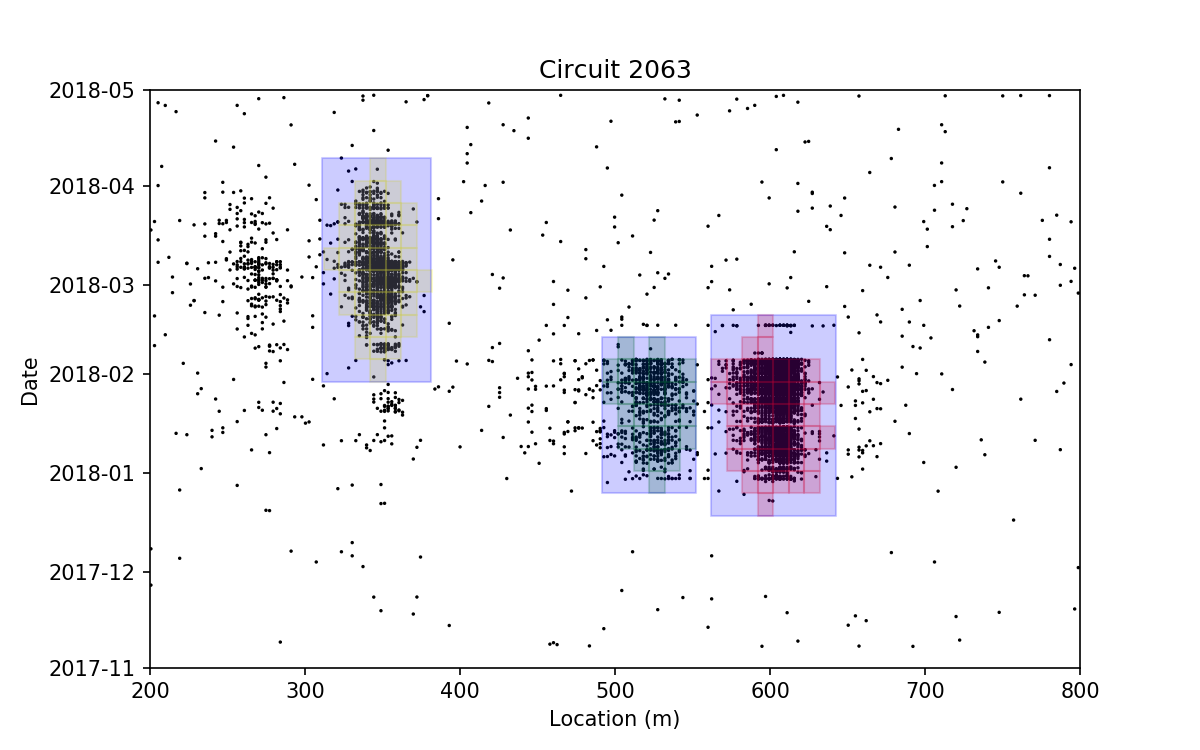

Saved to /notebooks/DBSCAN6.png


In [127]:
fig, ax = plt.subplots(figsize=(8,5))
clusterizer.plot.draw_location_time_scatter(circuitje, dot_size_to_charge_ratio=None, ax=ax)
cluster1,cluster2,data, weights = clusterizer.algorithms.clusterize_DBSCAN(circuitje, binLengthX = 10, binLengthY = 1, epsilon = 1, minPts = 100, shave = 0.01)
lis = []
for x in data[:,1]:
    lis.append(str((np.datetime64(int(x*60*60*24*7), 's'))))
labels = list(data[:,3])
counter = 0
colorcycle = ["red", "green", "yellow"]
for y in labels:
    if y != -1:
        base1 = np.datetime64('2017-08-21 14:39:00')
        base2 = 0
        while base1 < np.datetime64(lis[counter])-np.timedelta64(1, 'W'):
            base1 += np.timedelta64(1, 'W')
        while base2 < data[:,0][counter]-10:
            base2 += 10
        Cluster1 = clusterizer.cluster.Cluster(location_range = (base2+2, base2+12),time_range = (base1, base1 + np.timedelta64(1, 'W') ), found_by=["niks niemand niet"] )
        color = colorcycle[int(y)]
        clusterizer.plot.overlay_cluster(Cluster1, color=color)
    counter += 1
for cluster in cluster1:
    clusterizer.plot.overlay_cluster(cluster, color="blue")
ax.set_xlim(200,800)
ax.set_ylim(np.datetime64("2017-11", "ns"), np.datetime64("2018-05", "ns"))
clusterizer.plot.save_figure_for_google_slides("DBSCAN6")

<IPython.core.display.Javascript object>


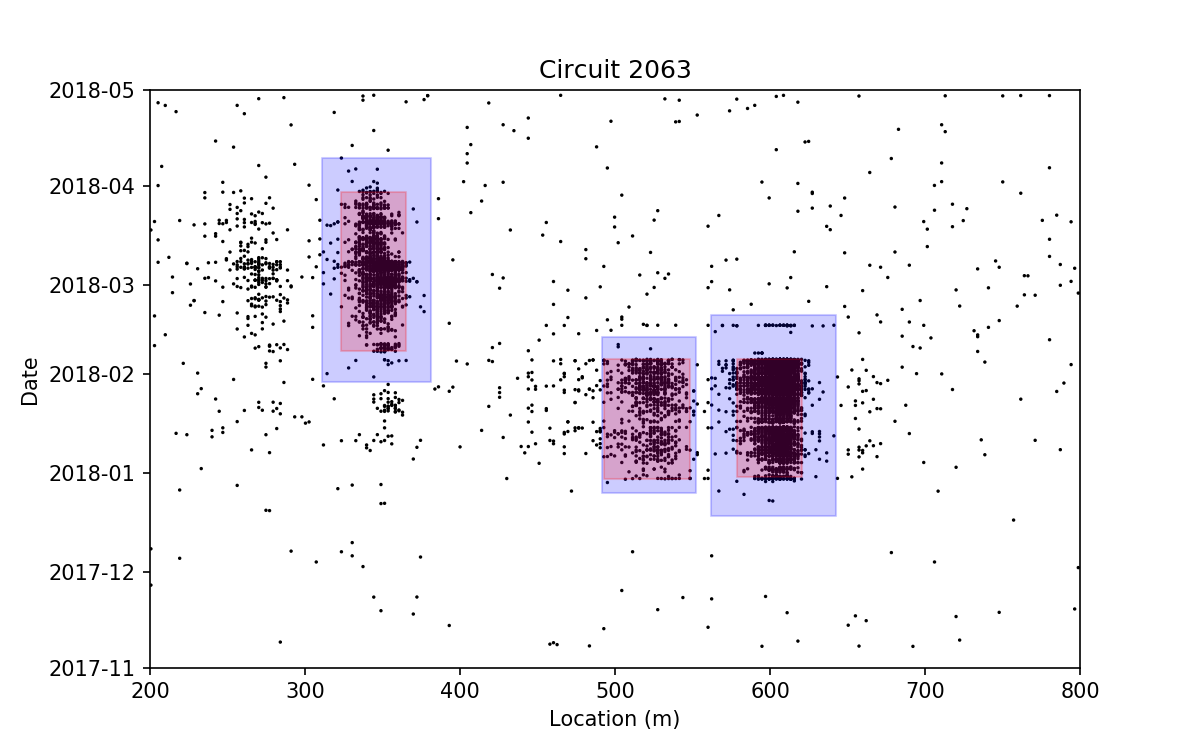

Saved to /notebooks/DBSCAN7.png


In [128]:
fig, ax = plt.subplots(figsize=(8,5))
clusterizer.plot.draw_location_time_scatter(circuitje, dot_size_to_charge_ratio=None)
for cluster in cluster1:
    clusterizer.plot.overlay_cluster(cluster, color="blue")
for cluster in cluster2:
    clusterizer.plot.overlay_cluster(cluster, color="red")
ax.set_xlim(200,800)
ax.set_ylim(np.datetime64("2017-11", "ns"), np.datetime64("2018-05", "ns"))
clusterizer.plot.save_figure_for_google_slides("DBSCAN7")

<IPython.core.display.Javascript object>


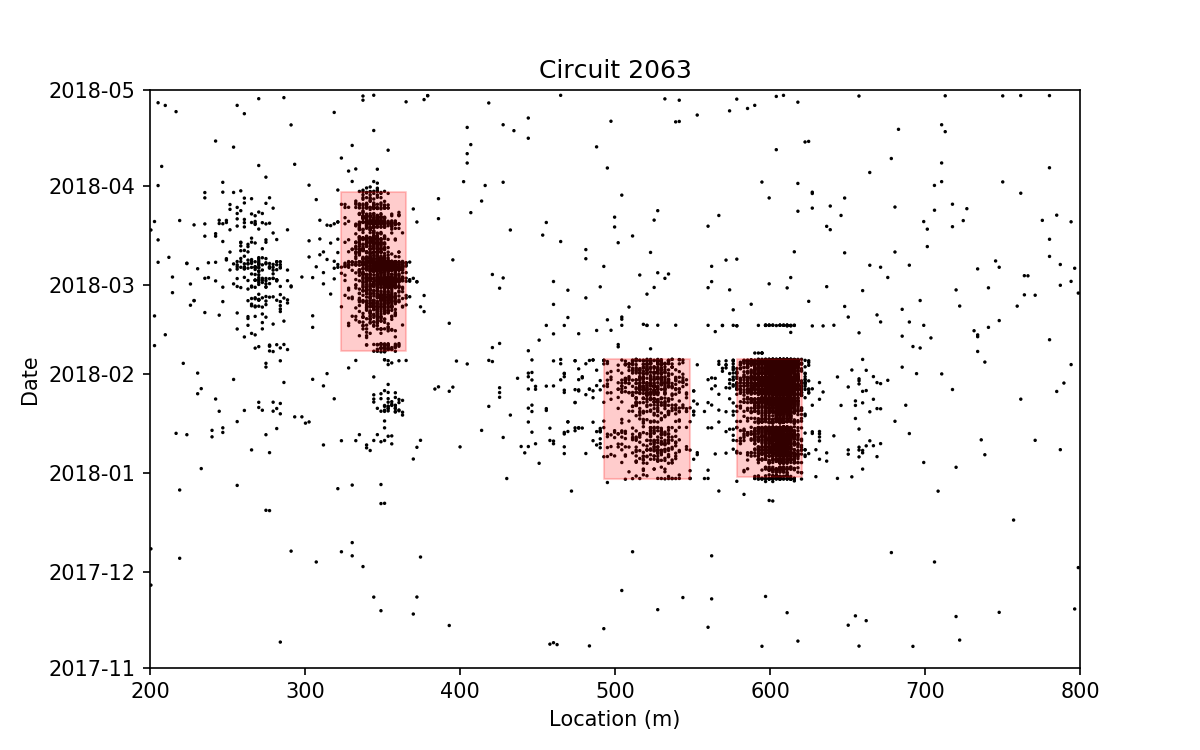

Saved to /notebooks/DBSCAN8.png


In [129]:
fig, ax = plt.subplots(figsize=(8,5))
clusterizer.plot.draw_location_time_scatter(circuitje, dot_size_to_charge_ratio=None)
#for cluster in clusters1:
    #clusterizer.plot.overlay_cluster(cluster, color="blue")
for cluster in cluster2:
    clusterizer.plot.overlay_cluster(cluster, color="red")
ax.set_xlim(200,800)
ax.set_ylim(np.datetime64("2017-11", "ns"), np.datetime64("2018-05", "ns"))
clusterizer.plot.save_figure_for_google_slides("DBSCAN8")

<IPython.core.display.Javascript object>


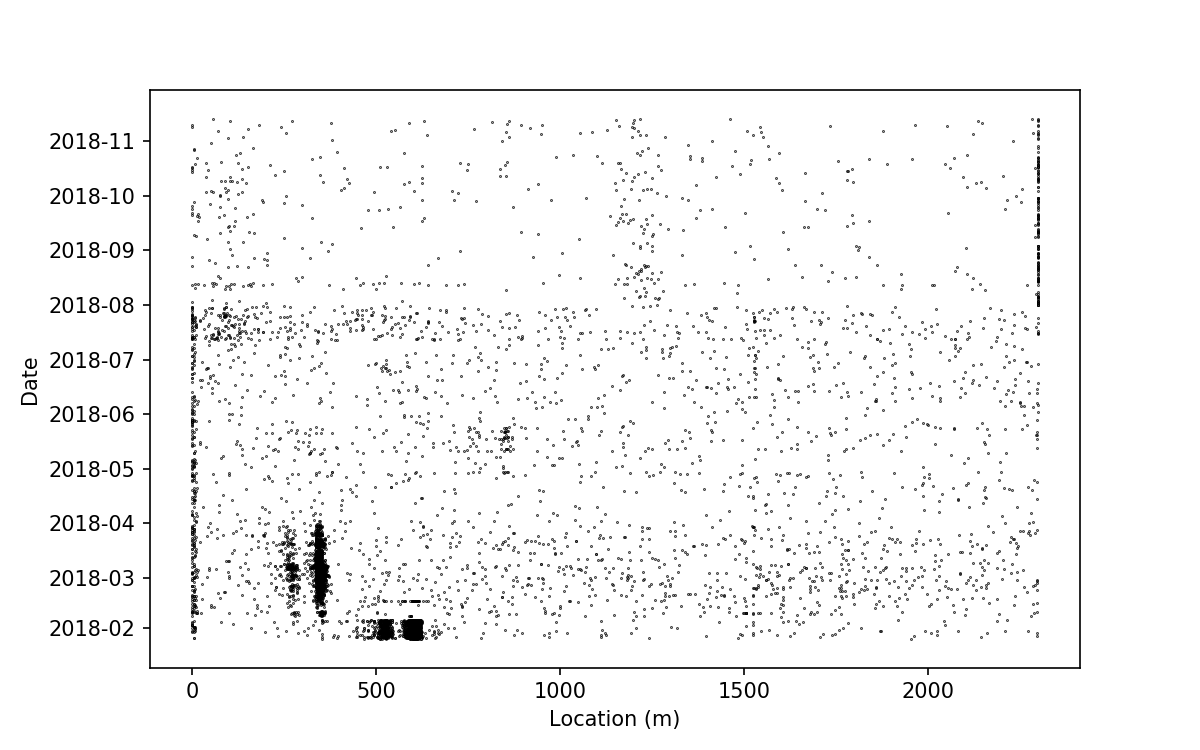

Text(0, 0.5, 'Date')

In [29]:
%matplotlib notebook
ax = plt.gca()
locations = circuitje.pd['Location in meters (m)'][circuitje.pd_occured.index>100000]
times = circuitje.pd['Date/time (UTC)'][circuitje.pd_occured.index>100000]

ax.scatter(x=locations, y=times, s=0.1, c="black")
ax.set_xlabel("Location (m)")
ax.set_ylabel("Date")

In [21]:
locations.index

Int64Index([   382,   1111,   1229,   1290,   1331,   1599,   1936,   2009,
              2202,   2296,
            ...
            368064, 368065, 368311, 368492, 368493, 368618, 368691, 368822,
            368834, 368840],
           dtype='int64', length=13941)

In [6]:
circuitje.circuitlength


2299.0

In [5]:
%%time
clusters1, clusters2 = clusterizer.algorithms.clusterize_DBSCAN(circuitje)
clusters3 = clusterizer.algorithms.clusterize_poisson(circuitje)[0]


Wall time: 240 ms


3169


<IPython.core.display.Javascript object>


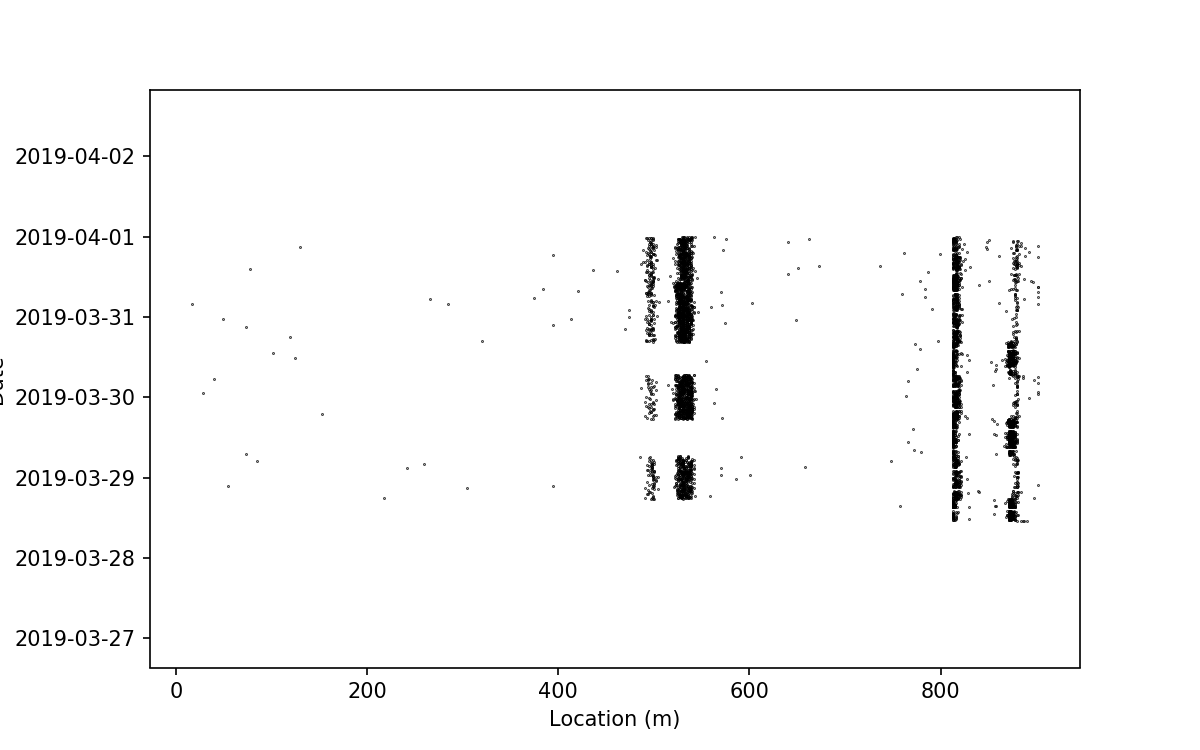

In [26]:
print(circuit_number)
%matplotlib notebook
clusterizer.plot.draw_location_time_scatter(circuitje, dot_size_to_charge_ratio=None)
for cluster in clusters1:
    clusterizer.plot.overlay_cluster(cluster, color="blue")
for cluster in clusters2:
    clusterizer.plot.overlay_cluster(cluster, color="red")



In [4]:
%matplotlib notebook
clusterizer.plot.draw_location_time_scatter(circuitje, dot_size_to_charge_ratio=None)

